# Sales Analysis

#### Install and import necessory libraries

In [1]:
!pip install pandas
!pip install os
!pip install matplotlib




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/71/00/46562cbdf644aeaa20666d920e2d6b71a0096ff987ef878ec510e4c1d886/fonttools-4.45.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/158.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/158.4 kB ? eta -:--


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Importing and Merging all files

In [11]:

folder_path = r"D:\data analyst Course data\Case study\Sales python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
all_data = pd.DataFrame()


for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        all_data = pd.concat([all_data, df], ignore_index=True)

print(all_data)

        
        
        


       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1           NaN                         NaN              NaN        NaN   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46           

#### Save the file

In [12]:
all_data.to_csv("all_data.csv", index=False)


In [13]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the Data

In [14]:
# when we merge all the files the headers of all the files are also duplicated
temp_df = all_data[all_data['Order ID'].str[0:5] == 'Order']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
# We have to drop all the duplicated rows
all_data = all_data[all_data['Order ID'].str[0:5] != 'Order']

In [16]:
# check for null values
na_df = all_data[all_data.isna().any(axis=1)]
na_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Drop nulls
all_data = all_data.dropna(how='all')

#### Create new 'month' column

In [21]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data ['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Make a Sales column

In [24]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
print(all_data.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99  


#### Create a City column

In [50]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(', ')[1]}, {x.split(', ')[2].split(' ')[0]}")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


#### What are the monthly Sales 

In [27]:
monthly_sales = all_data.groupby('Month').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'sum',
    'Sales': 'sum'
}).reset_index()
monthly_sales = monthly_sales.sort_values(by='Sales', ascending=False)

print(monthly_sales)

    Month  Quantity Ordered  Price Each       Sales
11     12             28114  4588415.41  4613443.34
9      10             22703  3715554.83  3736726.88
3       4             20558  3367671.02  3390670.24
10     11             19798  3180600.68  3199603.20
4       5             18667  3135125.13  3152606.75
2       3             17005  2791207.83  2807100.38
6       7             16072  2632539.56  2647775.76
5       6             15253  2562025.61  2577802.26
7       8             13448  2230345.42  2244467.88
1       2             13449  2188884.72  2202022.42
8       9             13109  2084992.09  2097560.13
0       1             10903  1811768.38  1822256.73


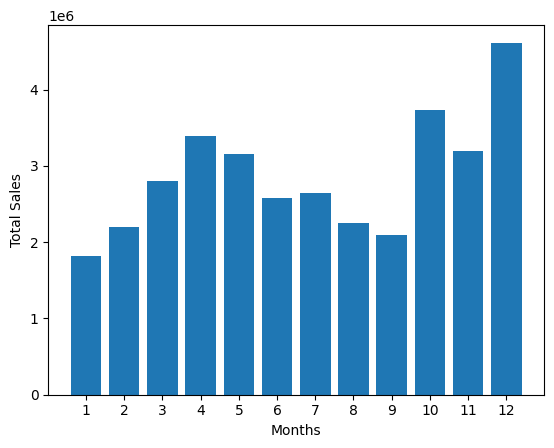

In [33]:
plt.bar(monthly_sales['Month'], monthly_sales['Sales'])
plt.xticks(monthly_sales['Month'])
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

#### December month have most sales and January has the slowest sales recorded

#### Sales according to cities

In [52]:
city_sales = all_data.groupby('City').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'sum',
    'Sales': 'sum'
}).reset_index()
city_sales = city_sales.sort_values(by='Sales', ascending=False)

print(city_sales)

                City  Quantity Ordered  Price Each       Sales
8  San Francisco, CA             50239  8211461.74  8262203.91
4    Los Angeles, CA             33289  5421435.23  5452570.80
5  New York City, NY             27932  4635370.83  4664317.43
2         Boston, MA             22528  3637409.77  3661642.01
0        Atlanta, GA             16602  2779908.20  2795498.58
3         Dallas, TX             16730  2752627.82  2767975.40
9        Seattle, WA             16553  2733296.01  2747755.48
7       Portland, OR             11303  1860558.22  1870732.34
1         Austin, TX             11153  1809873.61  1819581.75
6       Portland, ME              2750   447189.25   449758.27


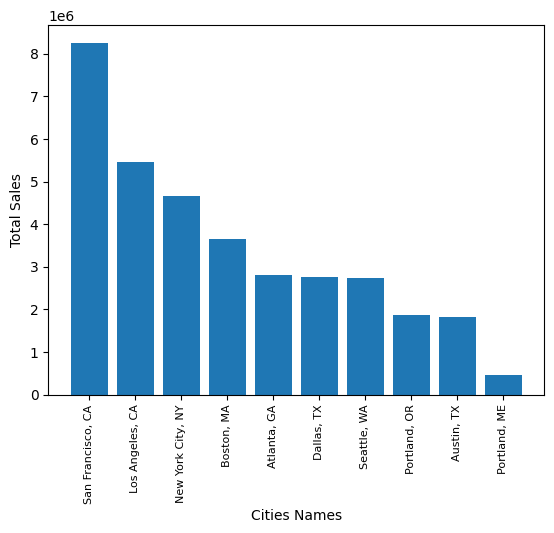

In [54]:
plt.bar(city_sales['City'], city_sales['Sales'])
plt.xticks(city_sales['City'], rotation= 'vertical', size= 8)
plt.xlabel('Cities Names')
plt.ylabel('Total Sales')
plt.show()

#### San Francisco, CA has the highest sales recorded and Portland, ME has the least sales record.

#### What time customers buy the most

In [59]:
# First we have to convert Order Date column into datetime data type
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')


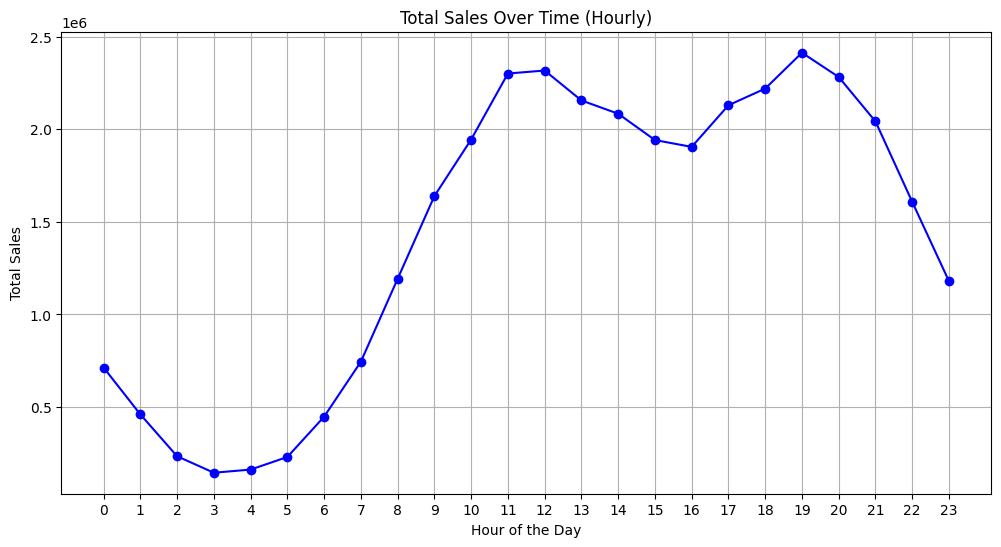

In [74]:
# Convert 'Order Date' column to datetime type
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Extract hour from 'Order Date' and create a new column 'Hour'
all_data['Hour'] = all_data['Order Date'].dt.hour

# Group data by 'Hour' and sum the 'Sales' for each hour
hourly_sales = all_data.groupby('Hour')['Sales'].sum()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time (Hourly)')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(range(24))  

# Show the plot
plt.show()



    

#### 11 AM to 7 PM is the peak time

#### What products are most sold?

In [77]:


product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()


product_sales = product_sales.sort_values(ascending=False)
product_sales.head()


Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64

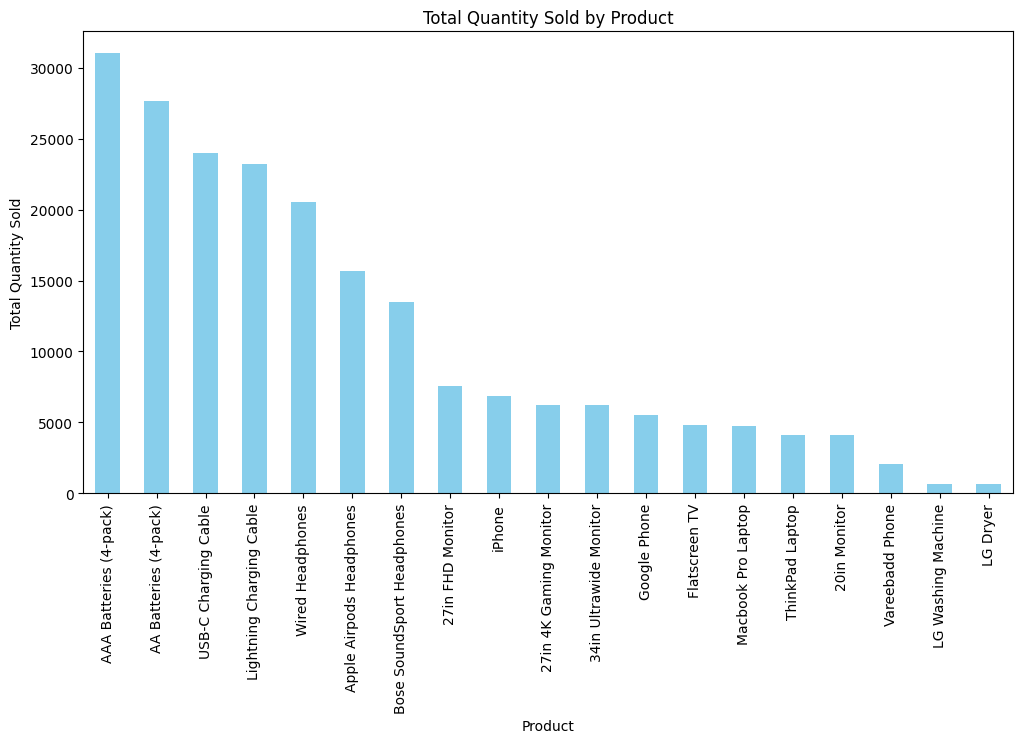

In [78]:
# Create a bar chart
plt.figure(figsize=(12, 6))


product_sales.plot(kind='bar', color='skyblue')


plt.title('Total Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)


plt.show()


#### AAA Batteries are the most sold product and LG Dryer is the least sold product

#### Products sold in respect to their prices

In [86]:


product_data = all_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

product_data = product_data.sort_values(by='Quantity Ordered', ascending=False)

product_data.head(20)



,Quantity Ordered,Price Each
Product,,
AAA Batteries (4-pack),31017,2.99
AA Batteries (4-pack),27635,3.84
USB-C Charging Cable,23975,11.95
Lightning Charging Cable,23217,14.95
Wired Headphones,20557,11.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
27in FHD Monitor,7550,149.99
iPhone,6849,700.00


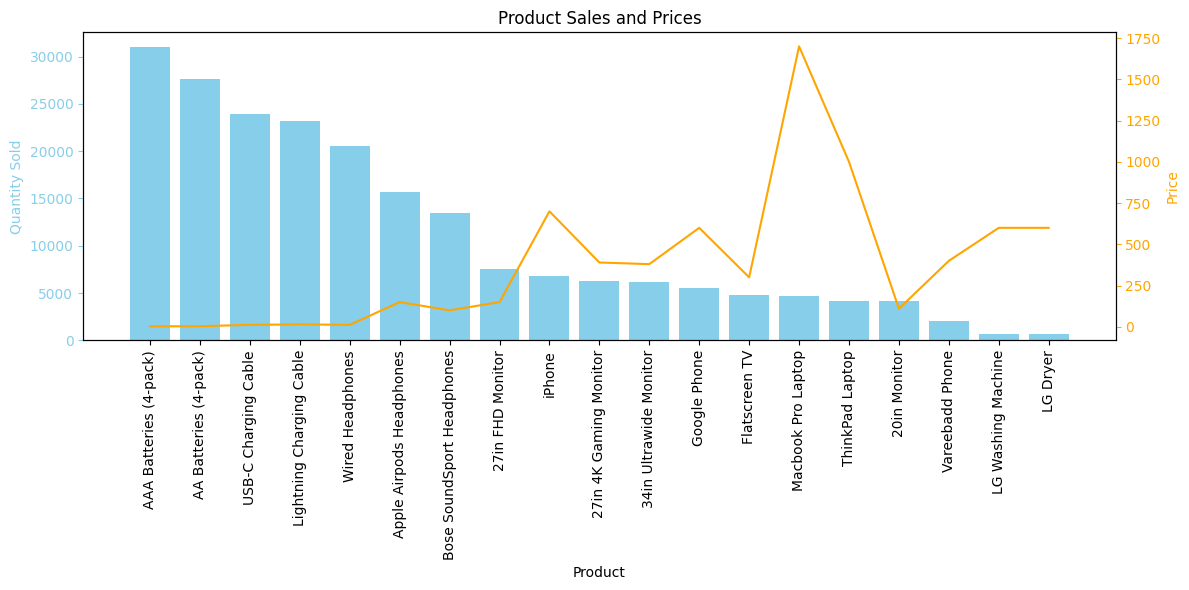

In [89]:

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(product_data.index, product_data['Quantity Ordered'], color='skyblue', label='Quantity Sold')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color='skyblue')
ax1.tick_params('y', colors='skyblue')

ax1.set_xticks(range(len(product_data.index)))
ax1.set_xticklabels(product_data.index, rotation=90, ha='center')

ax2 = ax1.twinx()
ax2.plot(product_data.index, product_data['Price Each'], color='orange', label='Price')
ax2.set_ylabel('Price', color='orange')
ax2.tick_params('y', colors='orange')

plt.title('Product Sales and Prices')
fig.tight_layout()
plt.show()


#### Lowest the price, higher the selling. LG Dryer has a high price and low selling.